In [1]:
from keras import models
from keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

In [2]:
!pip install livelossplot

In [3]:
import livelossplot
plot_losses = livelossplot.PlotLossesKeras()

%matplotlib inline

NUM_ROWS = 28
NUM_COLS = 28
NUM_CLASSES = 10
BATCH_SIZE = 128
EPOCHS = 10

In [4]:
def data_summary(X_train, y_train, X_test, y_test):
    """Summarize current state of dataset"""
    print('Train images shape:', X_train.shape)
    print('Train labels shape:', y_train.shape)
    print('Test images shape:', X_test.shape)
    print('Test labels shape:', y_test.shape)
    print('Train labels:', y_train)
    print('Test labels:', y_test)

In [5]:
mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [6]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Check state of dataset
data_summary(X_train, y_train, X_test, y_test)

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)
Train labels: [5 0 4 ... 5 6 8]
Test labels: [7 2 1 ... 4 5 6]


In [7]:
# dataset = mnist.load_data()
# len(dataset)

Train label --------------------->>> 5


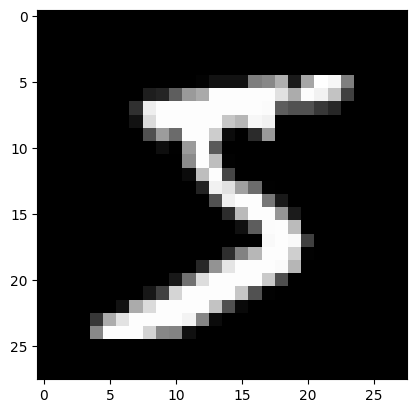

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

# pick a sample to plot
sample = 0
print("Train label --------------------->>>",y_train[sample])
image = X_train[sample]
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()


In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_train.shape[2]

28

In [11]:
print(X_train.shape)
# X_train.((X_train.shape[0], NUM_ROWS * NUM_COLS)).shape

(60000, 28, 28)


In [12]:
# Reshape data
X_train = X_train.reshape((X_train.shape[0], NUM_ROWS * NUM_COLS))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], NUM_ROWS * NUM_COLS))
X_test = X_test.astype('float32') / 255

In [13]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [14]:
# Categorically encode labels
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [15]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [16]:
# Check state of dataset
data_summary(X_train, y_train, X_test, y_test)

Train images shape: (60000, 784)
Train labels shape: (60000, 10)
Test images shape: (10000, 784)
Test labels shape: (10000, 10)
Train labels: [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Test labels: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [17]:
# Build neural network
model = models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(NUM_ROWS * NUM_COLS,)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [20]:
y_test.shape

(10000, 10)

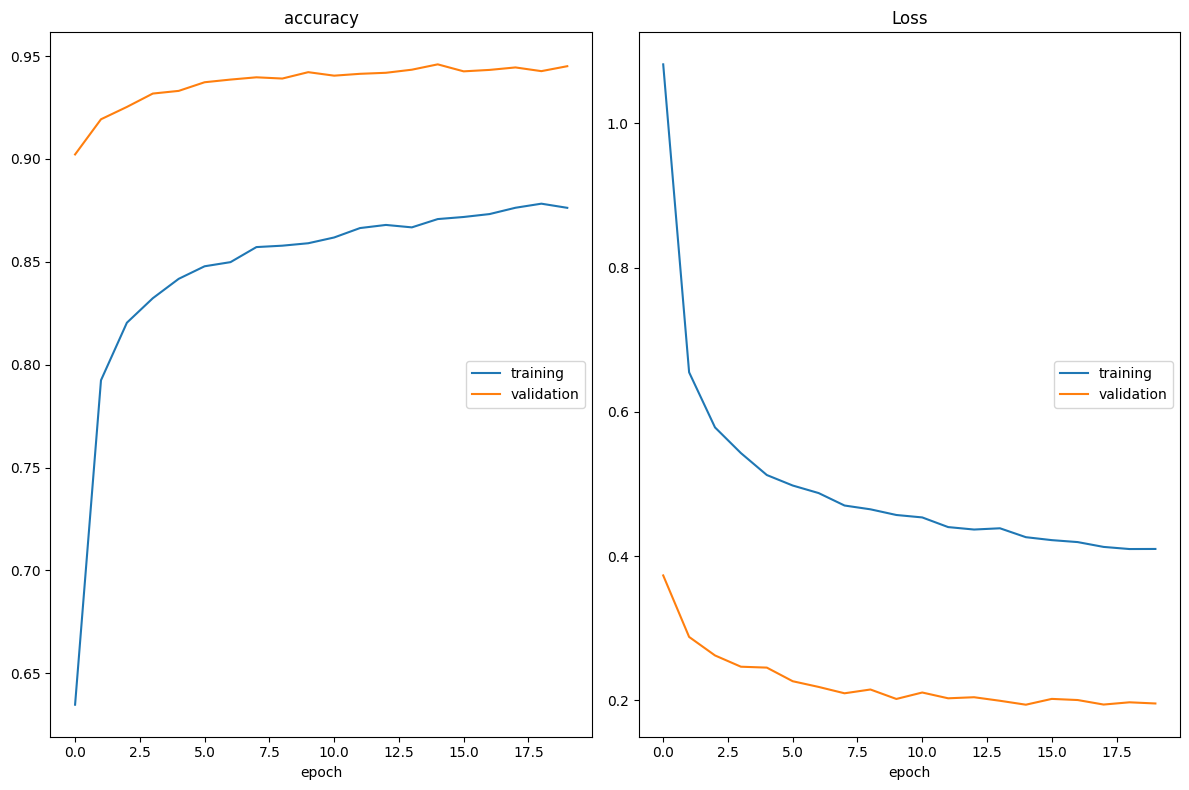

accuracy
	training         	 (min:    0.635, max:    0.878, cur:    0.876)
	validation       	 (min:    0.902, max:    0.946, cur:    0.945)
Loss
	training         	 (min:    0.410, max:    1.082, cur:    0.410)
	validation       	 (min:    0.194, max:    0.373, cur:    0.196)
469/469 [==============================] - 3s 5ms/step - loss: 0.4100 - accuracy: 0.8763 - val_loss: 0.1957 - val_accuracy: 0.9451
Test loss: 0.19571135938167572
Test accuracy: 0.9451000094413757


In [21]:

# Train model
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=20,
          callbacks=[plot_losses],
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [22]:
score = model.evaluate(X_test, y_test, verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 - 0s - loss: 0.1957 - accuracy: 0.9451 - 445ms/epoch - 1ms/step
Test loss: 0.19571135938167572
Test accuracy: 0.9451000094413757


In [27]:
predictions = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [31]:
predictions[0]

array([1.4491917e-11, 2.0115951e-09, 2.9617613e-05, 8.7421176e-06,
       9.1712480e-12, 1.2223325e-09, 4.6316953e-18, 9.9996167e-01,
       1.8795986e-10, 2.7099770e-08], dtype=float32)

In [32]:
y_test[2]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

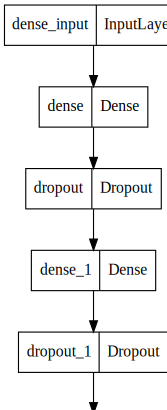

In [33]:
# Output network visualization
SVG(model_to_dot(model,dpi=64).create(prog='dot', format='svg'))